# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

fatal: destination path 'superhero' already exists and is not an empty directory.


In [2]:
!ls . && ls superhero

model.png  sample_data	superhero
LICENSE  README.md  superheroes.txt


In [3]:
with open('superhero/superheroes.txt', 'r') as f:
  data = f.read()

print(data[:50])

jumpa	
doctor fate	
starlight	
isildur	
lasher	
va


In [4]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [5]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [6]:
tokenizer.fit_on_texts(data)

In [7]:
char_to_index = tokenizer.word_index
char_to_index

{'\t': 1,
 'a': 2,
 'e': 3,
 'r': 4,
 'o': 5,
 'n': 6,
 'i': 7,
 ' ': 8,
 't': 9,
 's': 10,
 'l': 11,
 'm': 12,
 'h': 13,
 'd': 14,
 'c': 15,
 'u': 16,
 'g': 17,
 'k': 18,
 'b': 19,
 'p': 20,
 'y': 21,
 'w': 22,
 'f': 23,
 'v': 24,
 'j': 25,
 'z': 26,
 'x': 27,
 'q': 28}

In [8]:
index_to_char = dict((v, k) for k, v in char_to_index.items())
index_to_char

{1: '\t',
 2: 'a',
 3: 'e',
 4: 'r',
 5: 'o',
 6: 'n',
 7: 'i',
 8: ' ',
 9: 't',
 10: 's',
 11: 'l',
 12: 'm',
 13: 'h',
 14: 'd',
 15: 'c',
 16: 'u',
 17: 'g',
 18: 'k',
 19: 'b',
 20: 'p',
 21: 'y',
 22: 'w',
 23: 'f',
 24: 'v',
 25: 'j',
 26: 'z',
 27: 'x',
 28: 'q'}

## Task 3

1. Converting between names and sequences

In [9]:
names = data.split('\n')
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [10]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [11]:
t_to_sq = lambda name:[tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [12]:
sq_to_t = lambda s :''.join([index_to_char[i] for i in s if i!=0])

In [13]:
t_to_sq(names[0]), sq_to_t(t_to_sq(names[0]))

([25, 16, 12, 20, 2, 1], 'jumpa\t')

In [14]:
list(map(t_to_sq, ['holaaa','lalalaaa']))

[[13, 5, 11, 2, 2, 2], [11, 2, 11, 2, 11, 2, 2, 2]]

In [15]:
list(map(sq_to_t, [[13, 5, 11, 2, 2, 2], [11, 2, 11, 2, 11, 2, 2, 2]]))

['holaaa', 'lalalaaa']

## Task 4

1. Creating sequences
2. Padding all sequences

In [16]:
sequences = []

for l in list(map(t_to_sq, names)):
  for i in range(2, len(l)+1):
    sequences += [l[:i]]

sequences

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4],
 [14, 5, 15, 9, 5, 4, 8],
 [14, 5, 15, 9, 5, 4, 8, 23],
 [14, 5, 15, 9, 5, 4, 8, 23, 2],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3, 1],
 [10, 9],
 [10, 9, 2],
 [10, 9, 2, 4],
 [10, 9, 2, 4, 11],
 [10, 9, 2, 4, 11, 7],
 [10, 9, 2, 4, 11, 7, 17],
 [10, 9, 2, 4, 11, 7, 17, 13],
 [10, 9, 2, 4, 11, 7, 17, 13, 9],
 [10, 9, 2, 4, 11, 7, 17, 13, 9, 1],
 [7, 10],
 [7, 10, 7],
 [7, 10, 7, 11],
 [7, 10, 7, 11, 14],
 [7, 10, 7, 11, 14, 16],
 [7, 10, 7, 11, 14, 16, 4],
 [7, 10, 7, 11, 14, 16, 4, 1],
 [11, 2],
 [11, 2, 10],
 [11, 2, 10, 13],
 [11, 2, 10, 13, 3],
 [11, 2, 10, 13, 3, 4],
 [11, 2, 10, 13, 3, 4, 1],
 [24, 2],
 [24, 2, 4],
 [24, 2, 4, 24],
 [24, 2, 4, 24, 2],
 [24, 2, 4, 24, 2, 4],
 [24, 2, 4, 24, 2, 4, 2],
 [24, 2, 4, 24, 2, 4, 2, 1],
 [9, 13],


In [17]:
max_len = max([len(x) for x in sequences])
max_len

33

In [18]:
padding_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences,
    padding='pre',
    maxlen=max_len
)
padding_sequences

array([[ 0,  0,  0, ...,  0, 25, 16],
       [ 0,  0,  0, ..., 25, 16, 12],
       [ 0,  0,  0, ..., 16, 12, 20],
       ...,
       [ 0,  0,  0, ..., 11,  5, 20],
       [ 0,  0,  0, ...,  5, 20, 10],
       [ 0,  0,  0, ..., 20, 10,  1]], dtype=int32)

In [19]:
padding_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [20]:
padding_sequences[:,-1]
padding_sequences[:, :-1]

array([[ 0,  0,  0, ...,  0,  0, 25],
       [ 0,  0,  0, ...,  0, 25, 16],
       [ 0,  0,  0, ..., 25, 16, 12],
       ...,
       [ 0,  0,  0, ..., 15, 11,  5],
       [ 0,  0,  0, ..., 11,  5, 20],
       [ 0,  0,  0, ...,  5, 20, 10]], dtype=int32)

In [21]:
x, y = padding_sequences[:, :-1], padding_sequences[:, -1]
x.shape, y.shape

((88279, 32), (88279,))

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((70623, 32), (17656, 32))

In [23]:
num_chars = len(list(char_to_index.keys()) + ['0']) # also include padding char
num_chars

29

## Task 6: Creating the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dense, LSTM, Bidirectional

feature_vector_dim = 8

model = Sequential([
    Embedding(input_dim=num_chars, output_dim=8, input_length=max_len-1),
    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'),
    MaxPool1D(2),
    LSTM(32),
    Dense(num_chars, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 8)             232       
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            2624      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 29)                957       
                                                                 
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
____________________________________________________

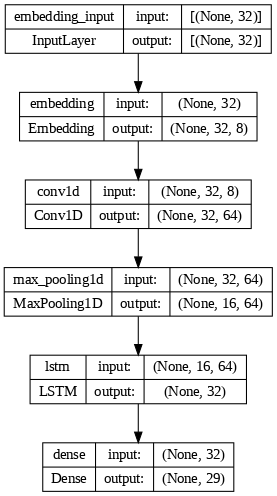

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=76)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dense, LSTM, Bidirectional

feature_vector_dim = 8

bidir_model = Sequential([
    Embedding(input_dim=num_chars, output_dim=8, input_length=max_len-1),
    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'),
    MaxPool1D(2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    Dense(num_chars, activation='softmax')
])

bidir_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

bidir_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 8)             232       
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            2624      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 16, 128)          66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                      

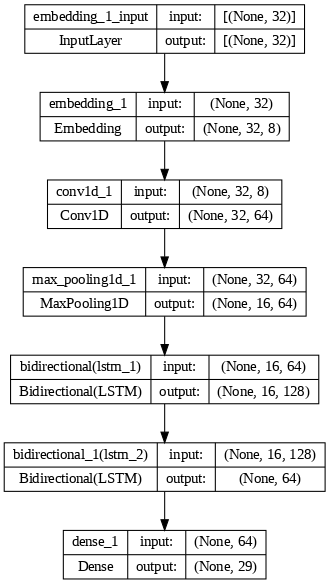

In [27]:
tf.keras.utils.plot_model(bidir_model, show_shapes=True, dpi=76)

## Task 7: Training the Model

In [28]:
history1 = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
    ]
)

Epoch 1/50
2207/2207 - 40s - loss: 2.7352 - accuracy: 0.1918 - val_loss: 2.5971 - val_accuracy: 0.2181 - 40s/epoch - 18ms/step
Epoch 2/50
2207/2207 - 30s - loss: 2.5228 - accuracy: 0.2423 - val_loss: 2.4988 - val_accuracy: 0.2407 - 30s/epoch - 13ms/step
Epoch 3/50
2207/2207 - 32s - loss: 2.4470 - accuracy: 0.2608 - val_loss: 2.4435 - val_accuracy: 0.2613 - 32s/epoch - 14ms/step
Epoch 4/50
2207/2207 - 30s - loss: 2.4024 - accuracy: 0.2740 - val_loss: 2.4161 - val_accuracy: 0.2683 - 30s/epoch - 14ms/step
Epoch 5/50
2207/2207 - 30s - loss: 2.3691 - accuracy: 0.2835 - val_loss: 2.3892 - val_accuracy: 0.2765 - 30s/epoch - 14ms/step
Epoch 6/50
2207/2207 - 31s - loss: 2.3395 - accuracy: 0.2919 - val_loss: 2.3614 - val_accuracy: 0.2847 - 31s/epoch - 14ms/step
Epoch 7/50
2207/2207 - 30s - loss: 2.3139 - accuracy: 0.2985 - val_loss: 2.3416 - val_accuracy: 0.2900 - 30s/epoch - 13ms/step
Epoch 8/50
2207/2207 - 30s - loss: 2.2913 - accuracy: 0.3066 - val_loss: 2.3291 - val_accuracy: 0.2972 - 30s/ep

In [ ]:
# took too long as GPU was not available :(

# history2 = bidir_model.fit(
#     x_train,
#     y_train,
#     validation_data=(x_test, y_test),
#     epochs=50,
#     verbose=2,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
#     ]
# )

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

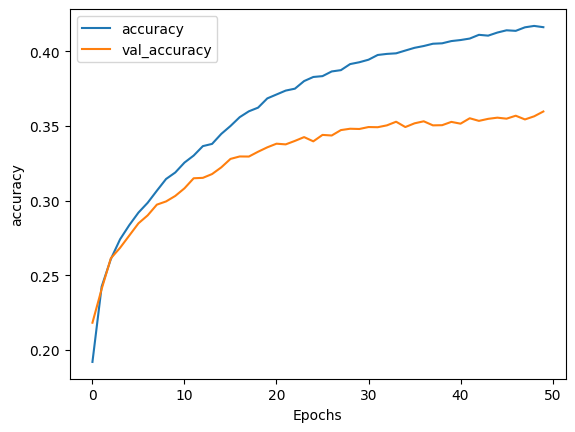

In [31]:
plot_graphs(history1, 'accuracy')

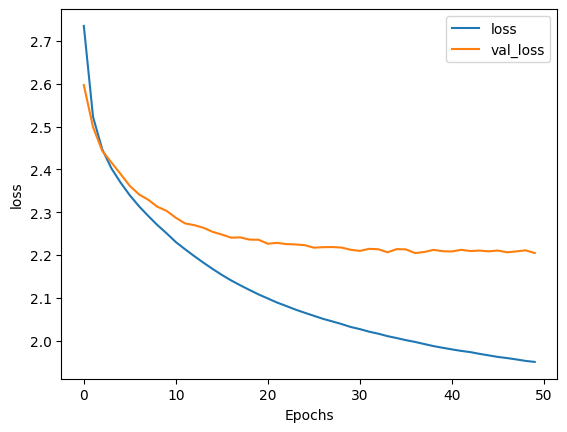

In [32]:
plot_graphs(history1, 'loss')

## Task 8: Generate Names!

In [37]:
def generate_names(seed):
  for i in range(0, 40):
    seq = t_to_sq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [seq],
        padding='pre',
        maxlen=max_len-1,
        truncating='pre'
    )
    pred = tf.argmax(model.predict(padded, verbose=False)[0]).numpy()
    pred_char = index_to_char[pred]
    seed += pred_char
    if pred_char == '\t':
      break
  return seed

In [55]:
print(generate_names('re'))
print(generate_names('magi'))
print(generate_names('her'))
print(generate_names('po'))
print(generate_names('sil'))

red lord	
magic stark	
herla	
porion man	
silver surfer	
